In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Select CSV file - Clean data
Carrier_Data = "Flightdata.csv"


In [3]:
# Read CSV file
Carrier_Data_df = pd.read_csv(Carrier_Data)


In [4]:
# Count lines in each colum
Carrier_Data_df.count()

UNIQUE_CARRIER_NAME    235105
ORIGIN                 235105
ORIGIN_CITY_NAME       235105
ORIGIN_STATE_ABR       216096
ORIGIN_STATE_NM        216096
ORIGIN_COUNTRY         235105
ORIGIN_COUNTRY_NAME    235105
ORIGIN_WAC             235105
DEST                   235105
DEST_CITY_NAME         235105
DEST_STATE_ABR         216363
DEST_STATE_NM          216363
DEST_COUNTRY           235105
DEST_COUNTRY_NAME      235105
DEST_WAC               235105
YEAR                   235105
QUARTER                235105
MONTH                  235105
DISTANCE_GROUP         235105
PASSENGERS             235105
DISTANCE               235105
CLASS                  235105
flight                 235105
dtype: int64

In [5]:
# Group per year
Carrier_Data_df2019 = Carrier_Data_df.loc[Carrier_Data_df['YEAR']==2019,:]
Carrier_Data_df2020 = Carrier_Data_df.loc[Carrier_Data_df['YEAR']==2020,:]

In [6]:
# used pivot table function to create dataframe for plot

Carrier_Analysis = pd.pivot_table(Carrier_Data_df2019, values='PASSENGERS', index='UNIQUE_CARRIER_NAME',
                    aggfunc=np.sum)
Carrier_Analysis['2019 Total'] = Carrier_Analysis.sum(axis=1)
Carrier_Analysis['2020 Total'] = Carrier_Analysis.sum(axis=1)

Carrier_Analysis

,PASSENGERS,2019 Total,2020 Total
UNIQUE_CARRIER_NAME,,,
40-Mile Air,281.0,281.0,562.0
ABC Aerolineas SA de CV dba Interjet,1372860.0,1372860.0,2745720.0
"ADVANCED AIR, LLC",15719.0,15719.0,31438.0
Aer Lingus Plc,1295915.0,1295915.0,2591830.0
"Aeroenlaces Nacionales, S.A. de C.V. d/b/a VivaAerobus",262990.0,262990.0,525980.0
...,...,...,...
Warbelow,2606.0,2606.0,5212.0
Westjet,3239371.0,3239371.0,6478742.0
Wright Air Service,32374.0,32374.0,64748.0


In [13]:
# Sort to select top 10 airlines in 2019
Sorted_Carrier = pd.DataFrame(Carrier_Analysis.sort_values("2019 Total", ascending=False))
Sorted_Carrier.head(10)

,PASSENGERS,2019 Total,2020 Total
UNIQUE_CARRIER_NAME,,,
Southwest Airlines Co.,95064991.0,95064991.0,190129982.0
Delta Air Lines Inc.,94095570.0,94095570.0,188191140.0
American Airlines Inc.,90900636.0,90900636.0,181801272.0
United Air Lines Inc.,67928558.0,67928558.0,135857116.0
JetBlue Airways,25213896.0,25213896.0,50427792.0
SkyWest Airlines Inc.,24258967.0,24258967.0,48517934.0
Alaska Airlines Inc.,20463026.0,20463026.0,40926052.0
Spirit Air Lines,19625225.0,19625225.0,39250450.0
Frontier Airlines Inc.,12699564.0,12699564.0,25399128.0


Text(0.5, 0, 'Carrier Name')

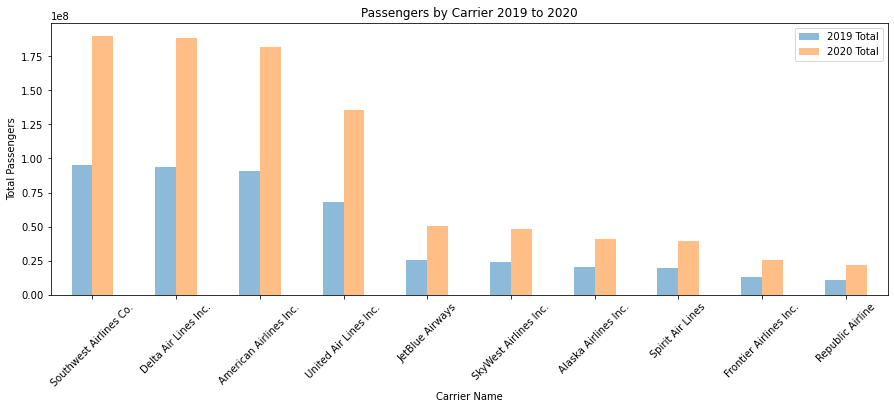

In [17]:
filtered_carrier = Sorted_Carrier[['2019 Total','2020 Total']].head(10)
filtered_carrier_bar = filtered_carrier.plot.bar(figsize=(15,5), alpha=0.5, align="center", title="Passengers by Carrier 2019 to 2020")
filtered_carrier_bar.set_xticklabels(filtered_carrier.index, rotation=45)
filtered_carrier_bar.set_ylabel("Total Passengers")
filtered_carrier_bar.set_xlabel("Carrier Name")
# for bar in filtered_carrier_bar.patches:
#     filtered_carrier_bar.annotate(format(bar.get_height(), '.0f'),  
#                    (bar.get_x() + bar.get_width() / 2,  
#                     bar.get_height()), ha='center', va='center', 
#                     xytext=(0, 5), 
#                    textcoords='offset points')
# plt.savefig("images/PassengersByCarrier2019-2020.png")
# total_2019 = Sorted_Carrier['2019 Total'].tolist()
# total_2020 = Sorted_Carrier['2020 Total'].tolist()

# x_axis =np.arange(1,8,100)
# y1 = total_2019 
# y2 = total_2020
# plt.plot(x_axis,y1,color="red")
# plt.plot(x_axis,y2,color="blue")

# plt.grid(True)
# plt.xlabel("Carrier Name")
# plt.ylabel("Passengers")
# plt.show()

AttributeError: 'tuple' object has no attribute 'plot'

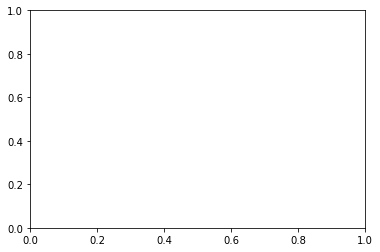

In [25]:
airlinelist_df = filtered_carrier.reset_index()
AL_list = airlinelist_df.UNIQUE_CARRIER_NAME.tolist()
x_axis = AL_list
x_axis

passengers2019 = airlinelist_df['2019 Total'].tolist()
passengers2020 = airlinelist_df['2020 Total'].tolist()

passengers2020

# AL_list = ['Southwest Airlines Co.','Delta Air Lines Inc.','American Airlines Inc.','United Air Lines Inc.','JetBlue Airways','SkyWest Airlines Inc.','Alaska Airlines Inc.', 'Spirit Air Lines', 'Frontier Airlines Inc.', 'Republic Airline']
# passengers2019 = '2019 Total'
# passengers2020 = '2020 Total'

ax1 = plt.subplots()
ax1.plot(x_axis, passengers2019, color='blue', label='2019 Passengers')
ax1.set_title("Top 10 impacted airlines") 
ax1.set_xlabel("Airline Name")
ax1.set_ylabel("Number of Passengers")
ax1.plot(x_axis, passengers2020, color='red', label='2020 Passengers')
ax1.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.figure(figsize=(9, 3))
plt.show()

